In [2]:
import pandas as pd

In [24]:
#crime_seoul_df = pd.DataFrame(pd.read_csv('Report_crime_2019.txt', sep="\t"))
#crime_seoul_df.to_excel('Report_crime_2019.xlsx', index=False)

In [3]:
crime_seoul = pd.read_excel('Report_crime_2019.xlsx')
crime_seoul.head()

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [4]:
crime_seoul = crime_seoul.drop('기간', axis=1)
crime_seoul.head()

,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [5]:
crime_seoul.rename(columns={
    '합계': '범죄', '합계.1': '검거', '살인.1':'살인검거', '강도.1':'강도검거', '강간강제추행':'강간', '강간강제추행.1':'강간검거', '절도.1':'절도검거', '폭력.1':'폭력검거', '자치구':'구별'
}, inplace=True)
crime_seoul.head()

,구별,범죄,검거,살인,살인검거,강도,강도검거,강간,강간검거,절도,절도검거,폭력,폭력검거
0,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823


In [6]:
crime_seoul.drop([0], axis=0, inplace=True)
crime_seoul.drop([1], axis=0, inplace=True)
crime_seoul.head()

,구별,범죄,검거,살인,살인검거,강도,강도검거,강간,강간검거,절도,절도검거,폭력,폭력검거
2,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
3,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
4,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
5,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
6,광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [7]:
crime_seoul.set_index('구별', inplace=True)
crime_seoul.head()

,범죄,검거,살인,살인검거,강도,강도검거,강간,강간검거,절도,절도검거,폭력,폭력검거
구별,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [8]:
crime_seoul = crime_seoul.replace('-', 0)
crime_seoul.head()

,범죄,검거,살인,살인검거,강도,강도검거,강간,강간검거,절도,절도검거,폭력,폭력검거
구별,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585


In [9]:
crime_seoul['살인검거율'] = crime_seoul['살인검거']/crime_seoul['살인'] * 100
crime_seoul['강도검거율'] = crime_seoul['강도검거']/crime_seoul['강도'] * 100
crime_seoul['강간검거율'] = crime_seoul['강간검거']/crime_seoul['강간'] * 100
crime_seoul['절도검거율'] = crime_seoul['절도검거']/crime_seoul['절도'] * 100
crime_seoul['폭력검거율'] = crime_seoul['폭력검거']/crime_seoul['폭력'] * 100
crime_seoul.head()

,범죄,검거,살인,살인검거,강도,강도검거,강간,강간검거,절도,절도검거,폭력,폭력검거,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,,,
종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892,125.000000,114.285714,480.252101,70.561056,90.874159
중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4011,2816,4,5,6,5,273,213,1875,1008,1853,1585,125.000000,83.333333,78.021978,53.760000,85.536967


In [10]:
crime_seoul = crime_seoul.drop(['살인검거', '강도검거', '강간검거', '절도검거', '폭력검거'], axis=1)
crime_seoul.head()

,범죄,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3313,2611,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,2512,1838,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4011,2816,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


In [11]:
df_sort = pd.read_csv('CCTVResult.csv', encoding='utf-8')
df_sort.set_index('구별', inplace=True)
crime_seoul['CCTV'] = df_sort['소계']
crime_seoul['인구수'] = df_sort['인구수']
crime_seoul

,범죄,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,CCTV,인구수
구별,,,,,,,,,,,,,,
종로구,3846,4117,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159,1471,158996
중구,4327,2804,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580,1544,134635
용산구,3313,2611,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310,2063,244645
성동구,2512,1838,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990,2679,300505
광진구,4011,2816,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967,1581,360109
동대문구,3692,2818,6,10,168,1531,1977,100.000000,90.000000,85.119048,54.016982,92.716237,2003,357014
중랑구,4268,3138,10,4,138,1666,2450,100.000000,125.000000,78.260870,54.501801,86.000000,1068,399562
성북구,2877,2323,3,3,176,1082,1613,100.000000,100.000000,73.863636,67.560074,90.266584,3003,447056
강북구,3838,3023,6,3,176,1229,2424,100.000000,66.666667,82.386364,54.027665,91.006601,1265,311569


### 서울 범죄 현황 시각화하기

In [12]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
from matplotlib import font_manager, rc

#font_path = "C:/Users/YEOM/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf"
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

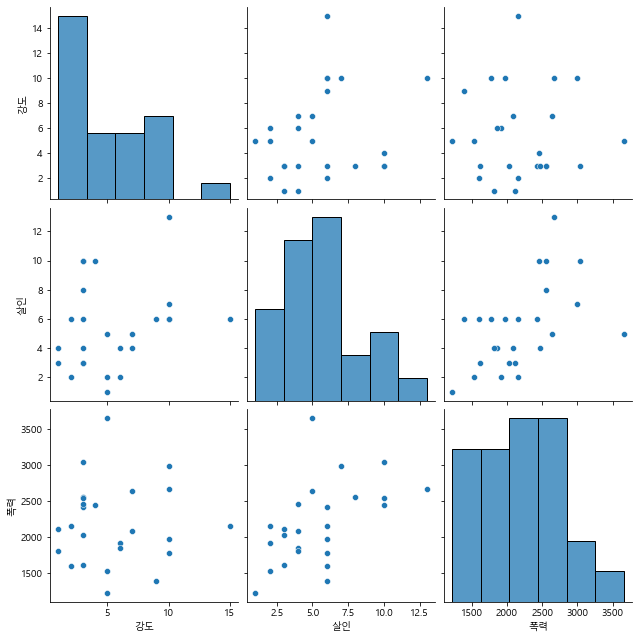

In [54]:
sns.pairplot(crime_seoul, vars=['강도', '살인', '폭력'], height=3)
plt.show()

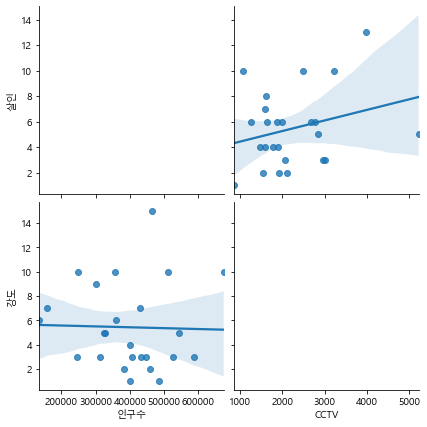

In [71]:
sns.pairplot(crime_seoul, x_vars=['인구수', 'CCTV'], y_vars=['살인', '강도'], kind='reg', height=3)
plt.show()

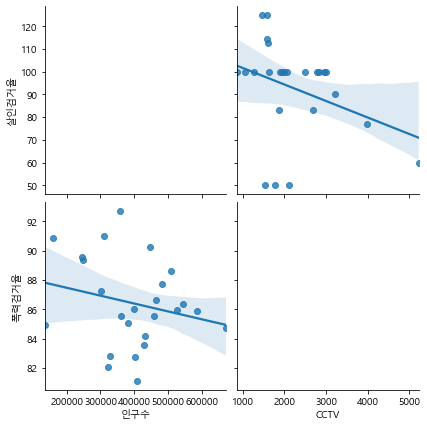

In [59]:
sns.pairplot(crime_seoul, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '폭력검거율'], kind='reg', height=3)
plt.show()

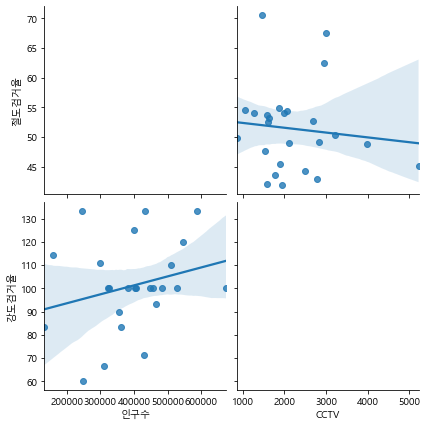

In [60]:
sns.pairplot(crime_seoul, x_vars=['인구수', 'CCTV'], y_vars=['절도검거율', '강도검거율'], kind='reg', height=3)
plt.show()

In [14]:
tmp_max = crime_seoul['검거'].max()
crime_seoul['검거'] = crime_seoul['검거'] / tmp_max * 100
crime_seoul_sort = crime_seoul.sort_values(by='검거', ascending=False)
crime_seoul_sort.head()

,범죄,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,CCTV,인구수
구별,,,,,,,,,,,,,,
강남구,7304,100.000000,5,5,666,2970,3658,60.000000,120.000000,84.384384,45.084175,86.358666,5221,544055
종로구,3846,81.219175,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159,1471,158996
관악구,5328,75.162754,13,10,408,2223,2674,76.923077,110.000000,82.107843,48.807917,88.593867,3985,509803
송파구,5698,74.945749,7,10,273,2416,2992,114.285714,100.000000,84.249084,42.052980,84.725936,1586,673926
영등포구,5820,74.709016,10,3,356,2409,3042,100.000000,100.000000,67.134831,44.333748,81.097962,2495,407367


In [15]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']
crime_seoul[target_col] = crime_seoul[target_col] / crime_seoul[target_col].max() * 100
crime_seoul_sort = crime_seoul.sort_values(by='검거', ascending=False)
crime_seoul_sort

,범죄,검거,살인,강도,강간,절도,폭력,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,CCTV,인구수
구별,,,,,,,,,,,,,,
강남구,7304,100.000000,5,5,666,2970,3658,48.000000,90.000000,17.570852,63.893850,93.142980,5221,544055
종로구,3846,81.219175,4,7,238,1515,2082,100.000000,85.714286,100.000000,100.000000,98.013210,1471,158996
관악구,5328,75.162754,13,10,408,2223,2674,61.538462,82.500000,17.096821,69.171183,95.553778,3985,509803
송파구,5698,74.945749,7,10,273,2416,2992,91.428571,75.000000,17.542679,59.598003,91.381983,1586,673926
영등포구,5820,74.709016,10,3,356,2409,3042,80.000000,75.000000,13.979081,62.830336,87.468997,2495,407367
서초구,5542,73.979089,5,7,616,2270,2644,80.000000,53.571429,13.926668,69.799269,90.151930,2835,429025
강서구,4924,69.895443,8,3,306,2050,2557,90.000000,100.000000,17.488092,74.455498,92.628752,1617,585901
구로구,4707,64.924048,10,3,226,1916,2552,72.000000,100.000000,15.202193,71.378388,90.781596,3227,432488
마포구,4842,62.536990,2,2,495,2190,2153,80.000000,75.000000,17.541292,59.341723,91.775264,1935,381858


<AxesSubplot:ylabel='구별'>

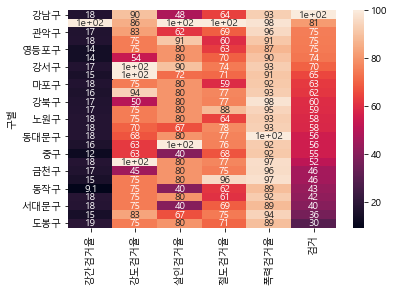

In [75]:
crime_seoul_sort = crime_seoul_sort.astype(float)
sns.heatmap(crime_seoul_sort[target_col], annot=True)

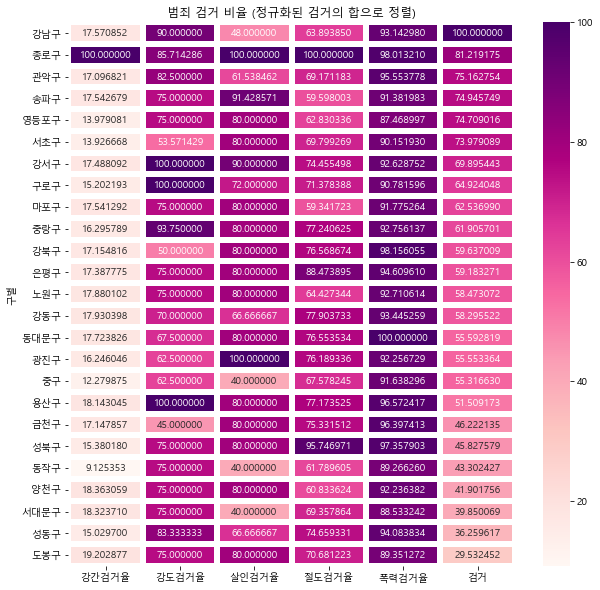

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(crime_seoul_sort[target_col], annot=True, fmt='f',  linewidths=5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()


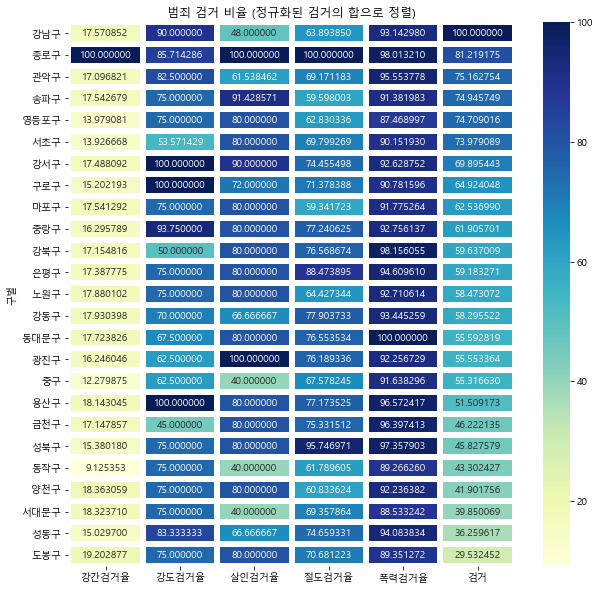

In [88]:
plt.figure(figsize=(10, 10))
sns.heatmap(crime_seoul_sort[target_col], annot=True, fmt='f',  linewidths=5, cmap='YlGnBu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()


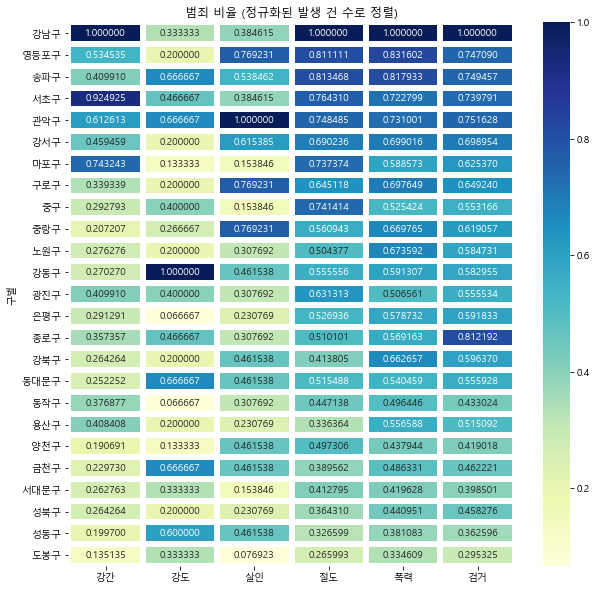

In [90]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '검거']
crime_seoul[target_col] = crime_seoul[target_col] / crime_seoul[target_col].max()
crime_seoul_sort = crime_seoul.sort_values(by='범죄', ascending=False)
crime_seoul_sort = crime_seoul_sort.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(crime_seoul_sort[target_col], annot=True, fmt='f',  linewidths=5, cmap='YlGnBu')
plt.title('범죄 비율 (정규화된 발생 건 수로 정렬)')
plt.show()

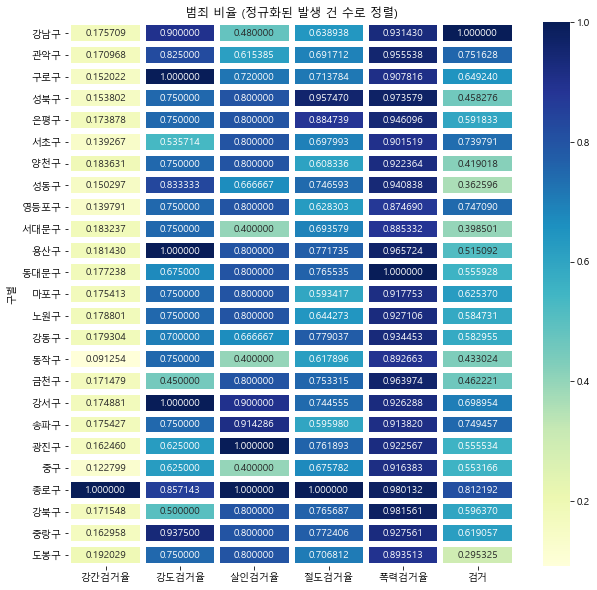

In [20]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']
crime_seoul[target_col] = crime_seoul[target_col] / crime_seoul[target_col].max()
crime_seoul_sort = crime_seoul.sort_values(by='CCTV', ascending=False)
crime_seoul_sort = crime_seoul_sort.astype(float)
plt.figure(figsize=(10, 10))
sns.heatmap(crime_seoul_sort[target_col], annot=True, fmt='f',  linewidths=5, cmap='YlGnBu')
plt.title('범죄 비율 (정규화된 발생 건 수로 정렬)')
plt.show()